In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib notebook

In [2]:
%aimport CryMOS.Bulk, CryMOS.QV

from CryMOS.QV import BeckersQVpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('seaborn-notebook')

<IPython.core.display.Javascript object>


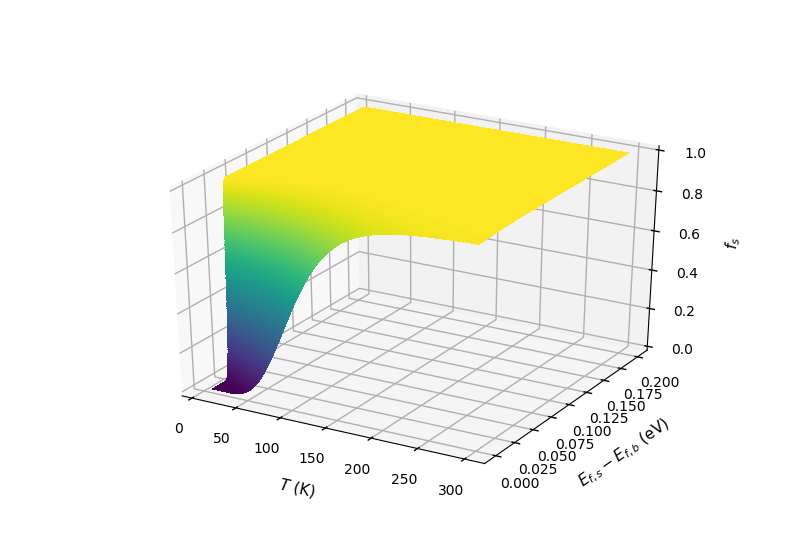

In [3]:
from scipy.constants import e, k
T = np.linspace(10, 300, 300)
del_psi = np.linspace(0, 0.2, 200)   # vary the energy starting from Ef_b to Tf_b plus 0.5 eV

bulk = BeckersQVpy(N_A=1e22)
Ef_b = bulk.param_sweep(temp=T).E_f

fs_ea = np.zeros(T.shape + del_psi.shape)

for i, b in enumerate(bulk.param_sweep(temp=T)):
    fs_ea[i,:] = b.fs_ea(b.psi_b + del_psi, 0.)

ax = plt.gca(projection='3d')
ax.contourf(*np.meshgrid(T, del_psi), fs_ea.T, 600, cmap=matplotlib.cm.viridis)
ax.set_xlabel(r"$T$ (K)",labelpad=15)
ax.set_ylabel(r"$E_{f,s}-E_{f,b}$ (eV)",labelpad=15)
ax.set_zlabel(r"$f_s$",labelpad=13)
ax.tick_params(axis='both', which='major')
plt.show()